In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(2020)

# Number of plots=500
X_0 = np.random.multivariate_normal([1, 1], [[10, 0], [0, 10]], 500)
y_0 = np.zeros(len(X_0))

# Number of plots=500
X_1 = np.random.multivariate_normal([10, 8], [[10, 0], [0, 10]], 500)
y_1 = np.ones(len(X_1))

X = np.vstack((X_0, X_1))
y = np.append(y_0, y_1)

# Training data : 70%, Test data : 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [3]:
# Standardized special data (mean = 0, standard deviation = 1)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

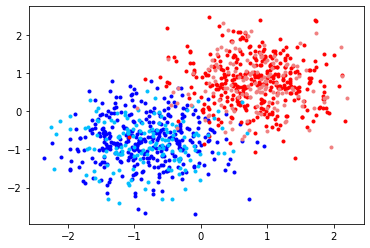

In [4]:
# Blue training data
plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], color='blue', marker='.')
# Red training data
plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], color='red', marker='.')
# Blue test data
plt.scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], color='deepskyblue', marker='.')
# Red test data
plt.scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], color='lightcoral', marker='.')

In [5]:
# Logistic regression function
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
# Correct Answer Labels for Test Data
print(lr.predict(X_test_std))

[1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0.]


In [7]:
# Confirmation of accuracy
print('accuracy : ', lr.score(X_test_std, y_test))

# Value of weight w0
print('w0 : ', lr.intercept_[0])
# Value of weight w1
print('w1 : ', lr.coef_[0, 0])
# Value of weight w2
print('w2 : ', lr.coef_[0, 1])

accuracy :  0.96
w0 :  0.003941162453749988
w1 :  3.793519947796855
w2 :  3.050083839539274


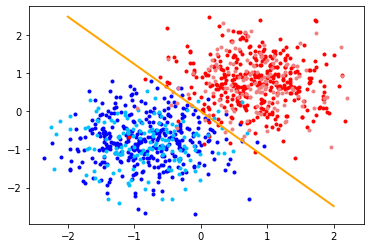

In [8]:
w_0 = lr.intercept_[0]
w_1 = lr.coef_[0, 0]
w_2 = lr.coef_[0, 1]

# Blue training data
plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], color='blue', marker='.')
# Red training data
plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], color='red', marker='.')
# Blue test data
plt.scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], color='deepskyblue', marker='.')
# Red test data
plt.scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], color='lightcoral', marker='.')

# Drawing a border
plt.plot([-2, 2], 
             list(map(lambda x: (-w_1*x - w_0)/w_2, [-2, 2])), 
             color='orange',
             linewidth=2)